Code to generate histogram of all RULA scores

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

In [30]:
os.chdir(r"C:\Users\anand\Desktop\BACH Labelled Data")
extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
# Left file names 
l_filenames = [i for i in glob.glob('*l BACH.{}'.format(extension))]
# Right file names
r_filenames = [i for i in glob.glob('*r BACH.{}'.format(extension))]
#combine all files in the list
# combined_csv = pd.concat([pd.read_csv(f,header=None) for f in all_filenames], axis=0)
# l_bach_scores = combined_csv.iloc[:,0].values
# r_bach_scores = combined_csv.iloc[:,1].values
l_bach_scores = pd.concat([pd.read_csv(f,header=None) for f in l_filenames], axis=0)
l_bach_scores = l_bach_scores.iloc[:,0].values
r_bach_scores = pd.concat([pd.read_csv(f,header=None) for f in r_filenames], axis=0)
r_bach_scores = r_bach_scores.iloc[:,0].values

os.chdir(r"C:\Users\anand\Desktop\RULA Labelled Data")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f,header=None) for f in all_filenames], axis=0)

l_rula_scores = combined_csv.iloc[:,58].values
r_rula_scores = combined_csv.iloc[:,59].values

os.chdir(r"C:\Users\anand\Desktop\HAL Labelled Data")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
l_hal_scores = pd.DataFrame()
r_hal_scores = pd.DataFrame()
for f in all_filenames:
    data = pd.read_csv(f)
    l_hal_scores = pd.concat([l_hal_scores,data['Left HAL']],axis=0)
    r_hal_scores = pd.concat([r_hal_scores,data['Right HAL']],axis=0)

l_hal_scores = l_hal_scores.values
r_hal_scores = r_hal_scores.values

In [31]:
len(l_hal_scores)

1449226

In [32]:
len(l_rula_scores)/3600/60

6.709532407407408

[]

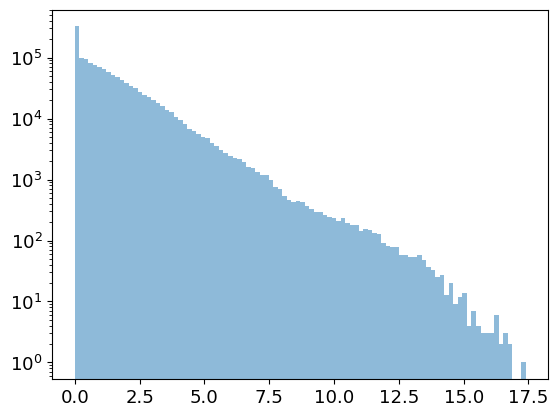

In [33]:
plt.hist(l_bach_scores, bins=100, alpha=0.5, label='Left BACH Scores')
plt.semilogy()

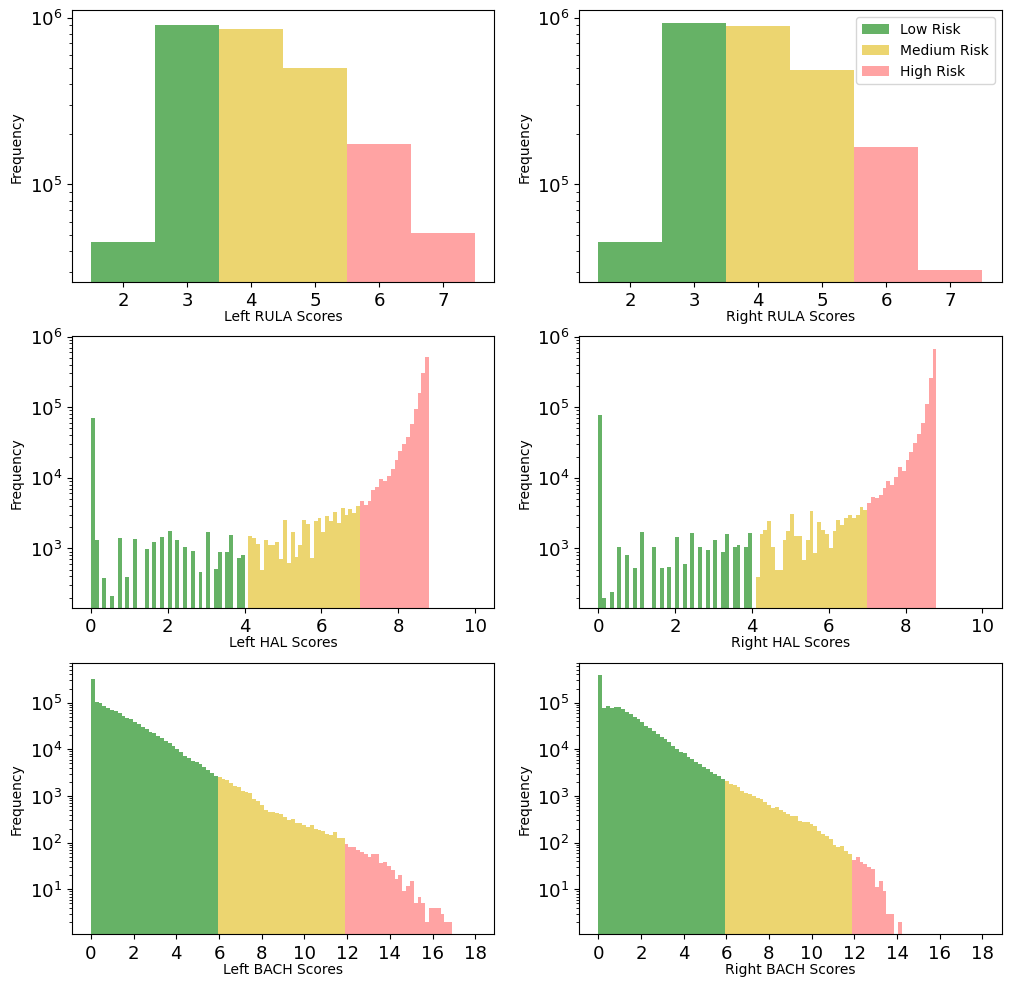

In [34]:
# Subplot with 3 rows, 2 columns
# RULA,HAL, and BACH scores for left and right hands
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
# Share y axis between left and right RULA scores
axs[0, 0].sharey(axs[0, 1])
# Low is 0-3, medium is 4,5 and high is 6-7
# Shade low bins with green, medium with yellow and high with red
bins = [2,3,4,5,6,7,8]
axs[0, 0].hist(l_rula_scores, bins=[2,3], alpha=0.6,color='green', label='Low Risk',align='left')
axs[0, 0].hist(l_rula_scores, bins=[3,4], alpha=0.6,color='green', label='Low Risk',align='left')
axs[0, 0].hist(l_rula_scores, bins=[4,5,6], alpha=0.7,color='#e5c433', label='Medium Risk',align='left')
axs[0, 0].hist(l_rula_scores, bins=[6,7,8], alpha=0.9,color='#ff9999', label='High Risk',align='left')
axs[0, 0].semilogy()
axs[0, 0].set_xlabel('Left RULA Scores',labelpad = 0)
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(r_rula_scores, bins=[2,3], alpha=0.6,color='green', label='Low Risk',align='left')
axs[0, 1].hist(r_rula_scores, bins=[3,4], alpha=0.6,color='green', align='left')
axs[0, 1].hist(r_rula_scores, bins=[4,5,6], alpha=0.7,color='#e5c433', label='Medium Risk',align='left')
axs[0, 1].hist(r_rula_scores, bins=[6,7,8], alpha=0.9,color='#ff9999', label='High Risk',align='left')
axs[0, 1].semilogy()
axs[0, 1].set_xlabel('Right RULA Scores',labelpad = 0)
axs[0, 1].set_ylabel('Frequency')
# Legend
axs[0, 1].legend(loc='upper right')

axs[1,1].sharey(axs[1, 0])
bins = np.linspace(0, 10, 101)
for i in range(100):
    if i < 40:
        axs[1, 0].hist(l_hal_scores, bins=[bins[i],bins[i+1]], alpha=0.6,color ='green')
        axs[1, 1].hist(r_hal_scores, bins=[bins[i],bins[i+1]], alpha=0.6,color ='green')
    elif i < 70:
        axs[1, 0].hist(l_hal_scores, bins=[bins[i],bins[i+1]], alpha=0.7,color ='#e5c433')
        axs[1, 1].hist(r_hal_scores, bins=[bins[i],bins[i+1]], alpha=0.7,color ='#e5c433')
    else:
        axs[1, 0].hist(l_hal_scores, bins=[bins[i],bins[i+1]], alpha=0.9,color ='#ff9999')
        axs[1, 1].hist(r_hal_scores, bins=[bins[i],bins[i+1]], alpha=0.9,color ='#ff9999')
# axs[1, 0].hist(l_hal_scores, bins=100, alpha=0.8,color ='#7ba2b2', label='Left HAL Scores')
axs[1, 0].semilogy()
axs[1, 0].set_xlabel('Left HAL Scores',labelpad = 0)
axs[1, 0].set_ylabel('Frequency')
axs[1, 1].semilogy()
axs[1, 1].set_xlabel('Right HAL Scores',labelpad = 0)
axs[1, 1].set_ylabel('Frequency')

bins = np.linspace(0,18,101)
axs[2, 0].sharey(axs[2, 1])
axs[2, 0].sharex(axs[2, 1])
for i in range(100):
    if i < 33:
        axs[2, 0].hist(l_bach_scores, bins=[bins[i],bins[i+1]], alpha=0.6,color ='green')
        axs[2, 1].hist(r_bach_scores, bins=[bins[i],bins[i+1]], alpha=0.6,color ='green')
    elif i < 66:
        axs[2, 0].hist(l_bach_scores, bins=[bins[i],bins[i+1]], alpha=0.7,color ='#e5c433')
        axs[2, 1].hist(r_bach_scores, bins=[bins[i],bins[i+1]], alpha=0.7,color ='#e5c433')
    else:
        axs[2, 0].hist(l_bach_scores, bins=[bins[i],bins[i+1]], alpha=0.9,color ='#ff9999')
        axs[2, 1].hist(r_bach_scores, bins=[bins[i],bins[i+1]], alpha=0.9,color ='#ff9999')
# axs[2, 0].hist(l_bach_scores, bins=100, alpha=0.8,color ='#c78747', label='Left BACH Scores')
axs[2, 0].semilogy()
axs[2, 0].set_xlabel('Left BACH Scores',labelpad = 0)
# Integer ticks
axs[2, 0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
axs[2, 0].set_ylabel('Frequency')
# axs[2, 1].hist(r_bach_scores, bins=100, alpha=0.8,color ='#c78747', label='Right BACH Scores')
axs[2, 1].semilogy()
axs[2, 1].set_xlabel('Right BACH Scores',labelpad = 0)
axs[2, 1].set_ylabel('Frequency')

plt.savefig(r"C:\Users\anand\Desktop\ergo paper figures\RULA_HAL_BACH_histogram.svg", format='svg', dpi=1200, bbox_inches='tight', pad_inches=0)

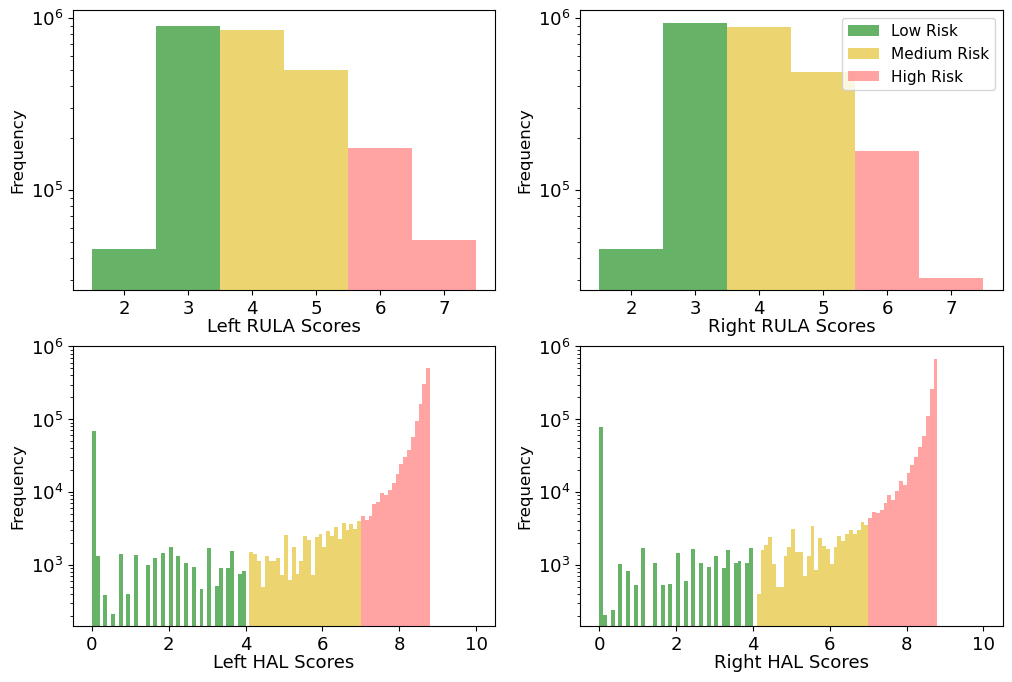

In [35]:
# Subplot with 3 rows, 2 columns
# RULA,HAL, and BACH scores for left and right hands
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
label_font_size = 13
plt.rc('xtick', labelsize=label_font_size)
plt.rc('ytick', labelsize=label_font_size-4)
# Share y axis between left and right RULA scores
axs[0, 0].sharey(axs[0, 1])
# Low is 0-3, medium is 4,5 and high is 6-7
# Shade low bins with green, medium with yellow and high with red
bins = [2,3,4,5,6,7,8]
axs[0, 0].hist(l_rula_scores, bins=[2,3], alpha=0.6,color='green', label='Low Risk',align='left')
axs[0, 0].hist(l_rula_scores, bins=[3,4], alpha=0.6,color='green', label='Low Risk',align='left')
axs[0, 0].hist(l_rula_scores, bins=[4,5,6], alpha=0.7,color='#e5c433', label='Medium Risk',align='left')
axs[0, 0].hist(l_rula_scores, bins=[6,7,8], alpha=0.9,color='#ff9999', label='High Risk',align='left')
axs[0, 0].semilogy()
axs[0, 0].set_xlabel('Left RULA Scores',labelpad = 0,fontsize=label_font_size)
# xticks = np.arange(1,8,1)
# axs[0,0].set_xticklabels(xticks,fontsize=label_font_size)
axs[0, 0].set_ylabel('Frequency',fontsize=label_font_size-1)

axs[0, 1].hist(r_rula_scores, bins=[2,3], alpha=0.6,color='green', label='Low Risk',align='left')
axs[0, 1].hist(r_rula_scores, bins=[3,4], alpha=0.6,color='green', align='left')
axs[0, 1].hist(r_rula_scores, bins=[4,5,6], alpha=0.7,color='#e5c433', label='Medium Risk',align='left')
axs[0, 1].hist(r_rula_scores, bins=[6,7,8], alpha=0.9,color='#ff9999', label='High Risk',align='left')
axs[0, 1].semilogy()
axs[0, 1].set_xlabel('Right RULA Scores',labelpad = 0,fontsize=label_font_size)
# xticks = np.arange(1,8,1)
# axs[0,1].set_xticklabels(xticks,fontsize=label_font_size)
axs[0, 1].set_ylabel('Frequency',fontsize=label_font_size-1)
# Legend
axs[0, 1].legend(loc='upper right',fontsize =  11)

axs[1,1].sharey(axs[1, 0])
bins = np.linspace(0, 10, 101)
for i in range(100):
    if i < 40:
        axs[1, 0].hist(l_hal_scores, bins=[bins[i],bins[i+1]], alpha=0.6,color ='green')
        axs[1, 1].hist(r_hal_scores, bins=[bins[i],bins[i+1]], alpha=0.6,color ='green')
    elif i < 70:
        axs[1, 0].hist(l_hal_scores, bins=[bins[i],bins[i+1]], alpha=0.7,color ='#e5c433')
        axs[1, 1].hist(r_hal_scores, bins=[bins[i],bins[i+1]], alpha=0.7,color ='#e5c433')
    else:
        axs[1, 0].hist(l_hal_scores, bins=[bins[i],bins[i+1]], alpha=0.9,color ='#ff9999')
        axs[1, 1].hist(r_hal_scores, bins=[bins[i],bins[i+1]], alpha=0.9,color ='#ff9999')
# axs[1, 0].hist(l_hal_scores, bins=100, alpha=0.8,color ='#7ba2b2', label='Left HAL Scores')
axs[1, 0].semilogy()
axs[1, 0].set_xlabel('Left HAL Scores',labelpad = 0 ,fontsize=label_font_size)

axs[1, 0].set_ylabel('Frequency',fontsize=label_font_size-1)
axs[1, 1].semilogy()
axs[1, 1].set_xlabel('Right HAL Scores',labelpad = 0,fontsize=label_font_size)
axs[1, 1].set_ylabel('Frequency',fontsize=label_font_size-1)

# bins = np.linspace(0,18,101)
# axs[2, 0].sharey(axs[2, 1])
# axs[2, 0].sharex(axs[2, 1])
# for i in range(100):
#     if i < 33:
#         axs[2, 0].hist(l_bach_scores, bins=[bins[i],bins[i+1]], alpha=0.6,color ='green')
#         axs[2, 1].hist(r_bach_scores, bins=[bins[i],bins[i+1]], alpha=0.6,color ='green')
#     elif i < 66:
#         axs[2, 0].hist(l_bach_scores, bins=[bins[i],bins[i+1]], alpha=0.7,color ='#e5c433')
#         axs[2, 1].hist(r_bach_scores, bins=[bins[i],bins[i+1]], alpha=0.7,color ='#e5c433')
#     else:
#         axs[2, 0].hist(l_bach_scores, bins=[bins[i],bins[i+1]], alpha=0.9,color ='#ff9999')
#         axs[2, 1].hist(r_bach_scores, bins=[bins[i],bins[i+1]], alpha=0.9,color ='#ff9999')
# # axs[2, 0].hist(l_bach_scores, bins=100, alpha=0.8,color ='#c78747', label='Left BACH Scores')
# axs[2, 0].semilogy()
# axs[2, 0].set_xlabel('Left BACH Scores',labelpad = 0)
# # Integer ticks
# axs[2, 0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
# axs[2, 0].set_ylabel('Frequency')
# # axs[2, 1].hist(r_bach_scores, bins=100, alpha=0.8,color ='#c78747', label='Right BACH Scores')
# axs[2, 1].semilogy()
# axs[2, 1].set_xlabel('Right BACH Scores',labelpad = 0)
# axs[2, 1].set_ylabel('Frequency')

plt.savefig(r"C:\Users\anand\Desktop\ergo paper figures\RULA_HAL_histogram.svg", format='svg', dpi=1200, bbox_inches='tight', pad_inches=0)

### Plot section

Text(0.5, 0.98, 'HAL Score Distribution for Left and Right Hand')

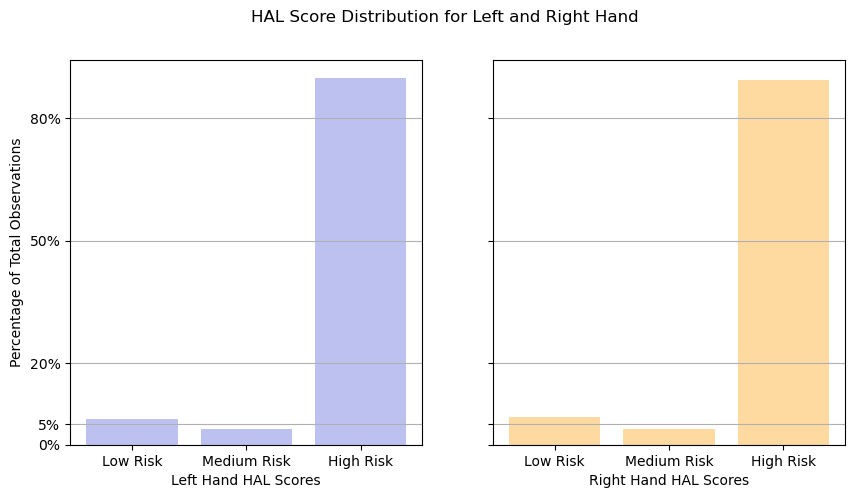

In [ ]:
# 0-<4 is low, 4-<7 is medium, 7-10 is high

l_low = np.sum(l_hal_scores < 4)/len(l_hal_scores)
l_med = np.sum((l_hal_scores >= 4) & (l_hal_scores < 7))/len(l_hal_scores)
l_high = np.sum(l_hal_scores >= 7)/len(l_hal_scores)

r_low = np.sum(r_hal_scores < 4)/len(r_hal_scores)
r_med = np.sum((r_hal_scores >= 4) & (r_hal_scores < 7))/len(r_hal_scores)
r_high = np.sum(r_hal_scores >= 7)/len(r_hal_scores)

l_hal = [l_low, l_med, l_high]
r_hal = [r_low, r_med, r_high]

# fig, ax = plt.subplots()
bar_width = 1
index = np.arange(3)

# Plot both hand RULA scores

# plot left RULA scores with no gap between bars

# plt.subplot(1,2,1)
# rects1 = plt.bar(index, l_rula, bar_width, color = '#bdc1f0', label = 'Left RULA')
# plt.xticks(index, ('Low Risk', 'Medium Risk', 'High Risk'))
# plt.yticks([0,10000,50000,100000])
# plt.xlabel('Left Hand RULA Scores')
# plt.ylabel('Count')
# plt.grid(axis = 'y')
# plt.tight_layout()

# # plot right RULA scores with no gap between bars

# plt.subplot(1,2,2)
# rects2 = plt.bar(index, r_rula, bar_width, color = '#f0bdc1', label = 'Right RULA')
# plt.xticks(index, ('Low Risk', 'Medium Risk', 'High Risk'))
# plt.yticks([0,10000,50000,100000])
# plt.xlabel('Right Hand RULA Scores')
# plt.ylabel('Count')
# plt.grid(axis = 'y')
# plt.tight_layout()

# Plot both hand RULA scores in subplots

fig, ax = plt.subplots(1,2, figsize = (10,5), sharey = True)
bar_width = 0.8
index = np.arange(3)

# plot left RULA scores with gap between bars
ax[0].bar(index, l_hal, bar_width, color = '#bdc1f0', label = 'Left RULA')
ax[0].set_xticks(index)
ax[0].set_xticklabels(('Low Risk', 'Medium Risk', 'High Risk'))
ax[0].set_yticks([0,0.05,0.2,0.5,0.8])
y_vals = ax[0].get_yticks()
ax[0].set_yticklabels(['{:,.0%}'.format(x) for x in y_vals])
# In percentage

ax[0].set_xlabel('Left Hand HAL Scores')
ax[0].set_ylabel('Percentage of Total Observations')
ax[0].grid(axis = 'y')
# ax[0].set_title('Left Hand RULA Scores')

# plot right RULA scores with gap between bars
ax[1].bar(index, r_hal, bar_width, color = '#ffdaa0', label = 'Right RULA')
ax[1].set_xticks(index)
ax[1].set_xticklabels(('Low Risk', 'Medium Risk', 'High Risk'))
# ax[1].set_yticks([0,10000,50000,100000])
ax[1].set_xlabel('Right Hand HAL Scores')
ax[1].grid(axis = 'y')
# ax[1].set_title('Right Hand RULA Scores')

fig.suptitle('HAL Score Distribution for Left and Right Hand')
# plt.tight_layout()


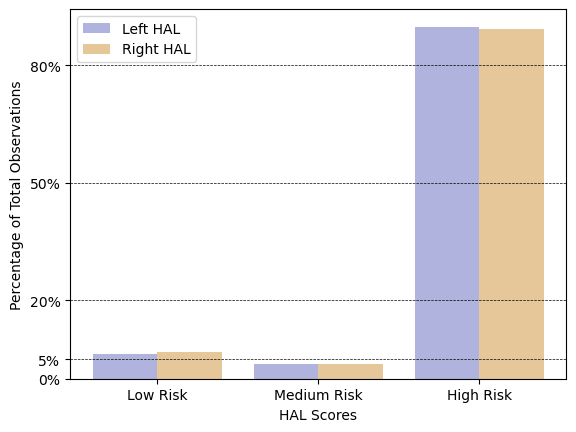

In [ ]:
# Plot both hand HAL scores in same plot

bar_width = 0.4

plt.bar(index, l_hal, bar_width, color = '#afb3de', label = 'Left HAL')

plt.bar(index + bar_width, r_hal, bar_width, color = '#e6c79a', label = 'Right HAL')

plt.xticks(index + bar_width/2, ('Low Risk', 'Medium Risk', 'High Risk'))
plt.yticks([0,0.05,0.2,0.5,0.8])
y_vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in y_vals])
plt.xlabel('HAL Scores')
plt.ylabel('Percentage of Total Observations')
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.5)
plt.legend()
# plt.title('HAL Score Distribution for Left and Right Hand')
# plt.tight_layout()
plt.savefig(r'C:\Users\anand\Desktop\ergo paper figures\HAL_Score_Distribution.svg', format = 'svg', dpi = 1200)